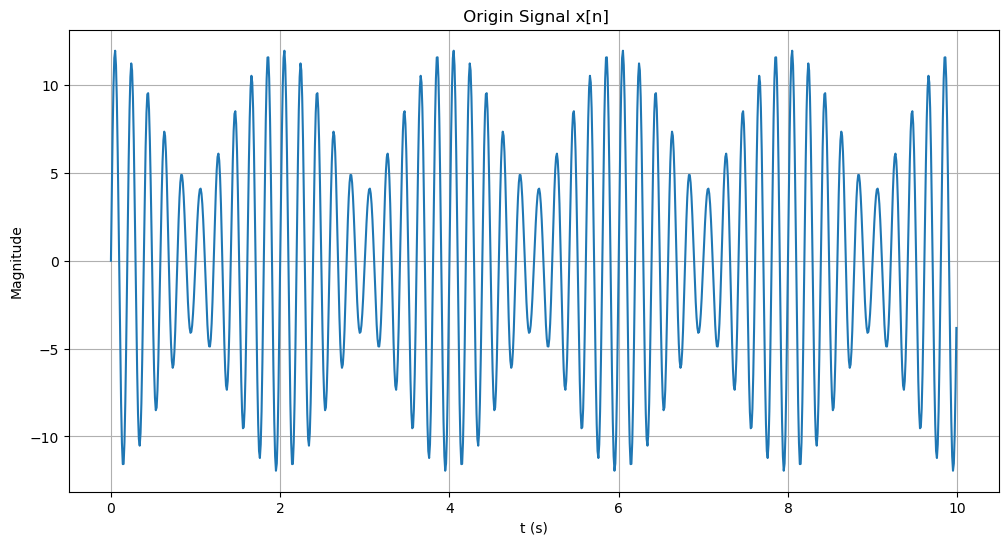

In [253]:
import numpy as np
import matplotlib.pyplot as plt

T = 0.01
fs = 100  
t = np.arange(0, 10, 1/fs) 
f1 = 5
f2 = 5.5
A1 = 8
A2 = 4
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

plt.figure(figsize=(12, 6))
plt.plot(t[:fs * 10], x[:fs * 10])
plt.title(' Origin Signal x[n]')
plt.xlabel('t (s)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


In [254]:
def idft(H, w):
    # N = len(H)
    # n = np.arange(N)
    # h = np.zeros(N, dtype=complex)
    # for i in range(N):
    #     for j in range(N):
    #         h[i] += H[j] * np.exp(1j * w[j] * i) / N
    
    # return h.real, n
    h = np.fft.ifft(H)
    h = np.fft.ifftshift(h)
    n = np.arange(len(h))
    return h, n



In [255]:
def dft(h):
    N = len(h)
    H = np.fft.fft(h)
    w = np.fft.fftfreq(N)
    return H , w

In [256]:
X, wx = dft(x)

In [257]:
def my_freqz(b, a, N):

    w = np.linspace(-np.pi, np.pi, N)

    def cap_h_value(bz, az, z: complex):
        num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
        den = sum([az[i] * z ** (-i) for i in range(len(az))])
        return num / den
    cap_hs = np.array([cap_h_value(b, a, np.exp(1j * omega)) for omega in w])
    return cap_hs, w  # values of H(w)

    M = len(b)
    omega = np.linspace(-np.pi, np.pi, N) 
    num = den = H = np.zeros(N, dtype=complex)
    
    for k in range(N):
        for n in range(M):
            num[k] += b[n] * np.exp(-1j * omega[k] * n) 
            den[k] += a[n] * np.exp(-1j * omega[k] * n)
        H[k] = num[k] / (den[k])
    return H, omega

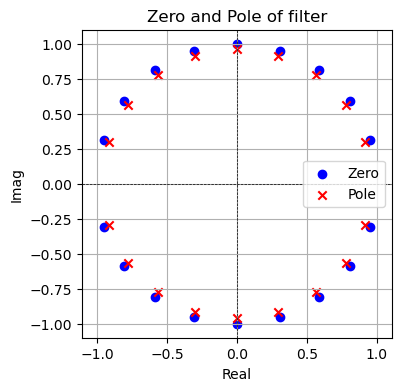

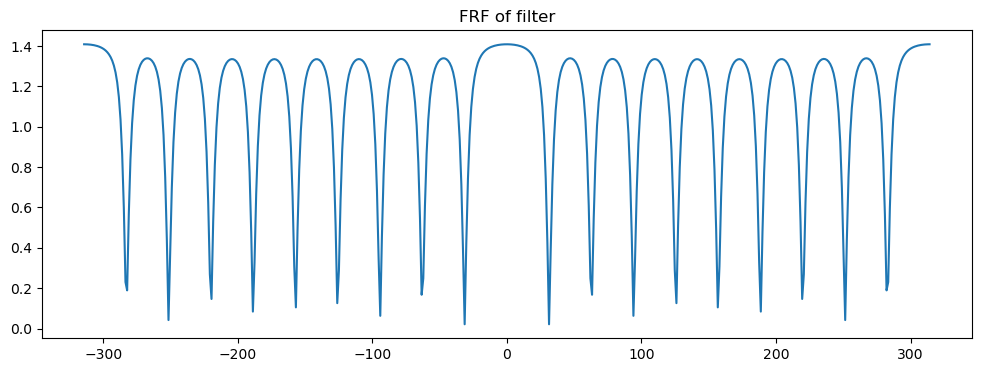

In [323]:
# 定义陷波滤波器的参数
f0 = f1  # 需要过滤的频率
Q = 1.041998
omega0 = 2 * np.pi * f0 / fs 

a = [1]
b = [1]

for i in range(1, 10):
    omega = omega0 * i
    tmpb = [1, -2 * np.cos(omega), 1]
    tmpa = [1, -2 * np.cos(omega) / Q, 1 / Q**2]
    a = np.convolve(a, tmpa)
    b = np.convolve(b, tmpb)


# 计算极点和零点
# b = [1, -2 * np.cos(omega0), 1]  # 滤波器的零点
# a = [1, -2 * np.cos(omega0) / Q, 1 / Q**2]  # 滤波器的极点

zeros = np.roots(b)
poles = np.roots(a)

plt.figure(figsize=(4, 4))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zero')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Pole')
plt.title('Zero and Pole of filter')
plt.xlabel('Real')
plt.ylabel('Imag')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

H_frf, w_frf = my_freqz(b, a, 512)
plt.figure(figsize=(12, 4))

plt.title("FRF of filter")

plt.plot(w_frf * fs, np.abs(H_frf))

plt.show()


In [259]:
def filter(bz, az, x, L):
    """
    `bz` and `az` is the coefficients of the difference equation.
    For the input signal x, this function will calculate first L terms of the output signal y.

    ## Examples

    ```py
    bz = [2, 3]
    az = [1, -0.5]
    L = 100
    xs = [1, 2, 3]
    xs, ys = filter(bz, az, xs, L)  # first several inputs
    debug_draw(np.arange(L), ys, label="Outputs")
    ```
    """
    def expand(arr, n):
        return np.pad(arr, (0, n - len(arr)), 'constant')
    xs = expand(x, L)
    ys = np.zeros_like(xs)

    def y_at(n):
        return 0 if n < 0 else ys[n]

    def x_at(n):
        return 0 if n < 0 else xs[n]
    for n in range(L):
        ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))]) - \
            sum([az[i] * y_at(n - i) for i in range(1, len(az))])
    return xs, ys

In [260]:
# Step 6: 定义myfilter函数
def myfilter(b, a, x):
    L = len(x)
    xs, ys = filter(b, a, x, L)
    return ys
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = b[0] * x[n]
        if n >= 1:
            y[n] += b[1] * x[n - 1] - a[1] * y[n - 1]
        if n >= 2:
            y[n] += b[2] * x[n - 2] - a[2] * y[n - 2]
    return y


信号 x[n] 中 5Hz 的幅度: 4000.00
信号 x[n] 中 5.5Hz 的幅度: 2000.00
滤波后信号 y1 中 5Hz 的幅度: 545.41
滤波后信号 y1 中 5.5Hz 的幅度: 1977.48


C:\Users\Modes\AppData\Local\Temp\ipykernel_11912\2662074740.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Modes\AppData\Local\Temp\ipykernel_11912\2662074740.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


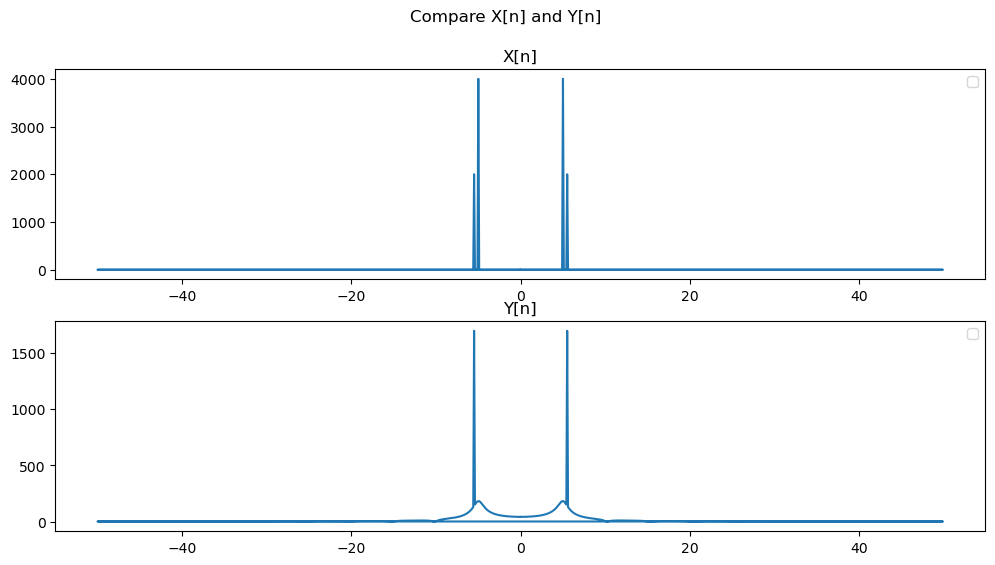

In [324]:
# 进行滤波
y1 = myfilter(b, a, x)

# 计算频率成分
frequencies = np.fft.fftfreq(len(x), d=1/fs)
Y1, wy1 = dft(y1)

# 计算5Hz和5.5Hz的幅度
amp_x_5 = np.abs(X[np.isclose(frequencies, 5, atol=0.1)]).sum()
amp_x_5_5 = np.abs(X[np.isclose(frequencies, 5.5, atol=0.1)]).sum()
amp_y1_5 = np.abs(Y1[np.isclose(frequencies, 5, atol=0.1)]).sum()
amp_y1_5_5 = np.abs(Y1[np.isclose(frequencies, 5.5, atol=0.1)]).sum()

print(f'信号 x[n] 中 5Hz 的幅度: {amp_x_5:.2f}')
print(f'信号 x[n] 中 5.5Hz 的幅度: {amp_x_5_5:.2f}')
print(f'滤波后信号 y1 中 5Hz 的幅度: {amp_y1_5:.2f}')
print(f'滤波后信号 y1 中 5.5Hz 的幅度: {amp_y1_5_5:.2f}')

plt.figure(figsize=(12, 6))

plt.suptitle("Compare X[n] and Y[n]")

plt.subplot(211)
plt.title("X[n]")
plt.plot(wx * fs, np.abs(X))
#plt.axvline(x=5, color='r', linestyle='--', label=f'f = {5}')
#plt.axvline(x=5.5, color='g', linestyle='--', label=f'f = {5.5}')
plt.legend()

plt.subplot(212)
plt.title("Y[n]")
plt.plot(wy1 * fs, np.abs(Y1))
#plt.axvline(x=5, color='r', linestyle='--', label=f'f = {5}')
#plt.axvline(x=5.5, color='g', linestyle='--', label=f'f = {5.5}')
plt.legend()

plt.show()


In [307]:
small_line = 0.0052

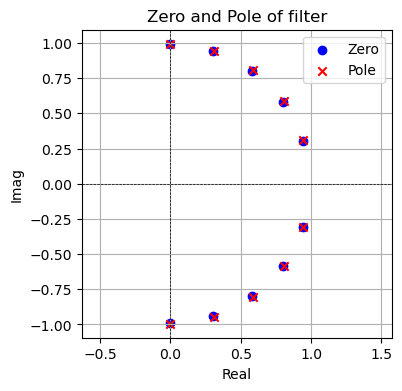

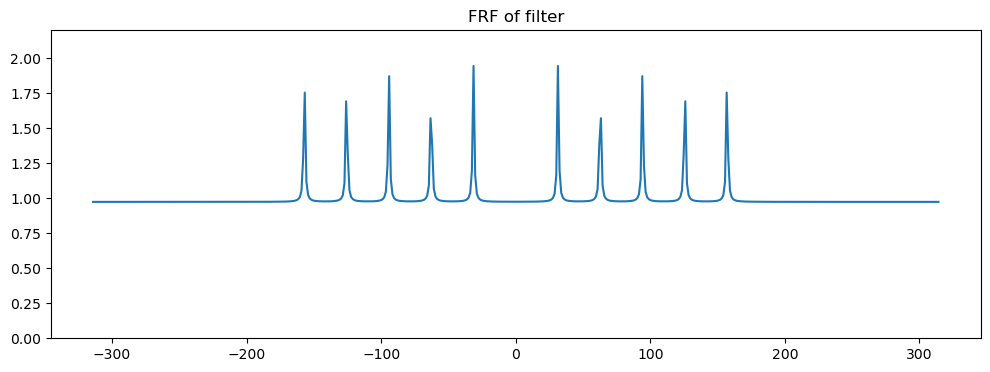

In [316]:
def calc_Q(l): # l 为单位圆上某点往内位移
    return 1 / (1 - l)

# 定义梳状滤波器的参数
f0 = f1  # 需要过滤的频率
omega0 = 2 * np.pi * f0 / fs  # 归一化频率

# small_line = 0.010439
Q_b = calc_Q(small_line * 2)
Q_a = calc_Q(small_line)

a = [1]
b = [1]

for i in range(1, 6):
    omega = omega0 * i
    tmpb = [1, -2 * np.cos(omega) / Q_b, 1 / Q_b ** 2]
    tmpa = [1, -2 * np.cos(omega) / Q_a, 1 / Q_a ** 2]
    a = np.convolve(a, tmpa)
    b = np.convolve(b, tmpb)


# 计算极点和零点
# b = [1, -2 * np.cos(omega0), 1]  # 滤波器的零点
# a = [1, -2 * np.cos(omega0) / Q, 1 / Q**2]  # 滤波器的极点

# 计算极点和零点位置
zeros = np.roots(b)
poles = np.roots(a)

# 绘制极点和零点
plt.figure(figsize=(4, 4))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zero')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Pole')
plt.title('Zero and Pole of filter')
plt.xlabel('Real')
plt.ylabel('Imag')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

H_frf, w_frf = my_freqz(b, a, 512)
plt.figure(figsize=(12, 4))

plt.title("FRF of filter")

plt.plot(w_frf * fs, np.abs(H_frf))
plt.ylim(0, 2.2)

plt.show()


信号 x[n] 中 5Hz 的幅度: 4000.00
信号 x[n] 中 5.5Hz 的幅度: 2000.00
滤波后信号 y2 中 5Hz 的幅度: 8033.48
滤波后信号 y2 中 5.5Hz 的幅度: 2251.75


C:\Users\Modes\AppData\Local\Temp\ipykernel_11912\2062139036.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Modes\AppData\Local\Temp\ipykernel_11912\2062139036.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


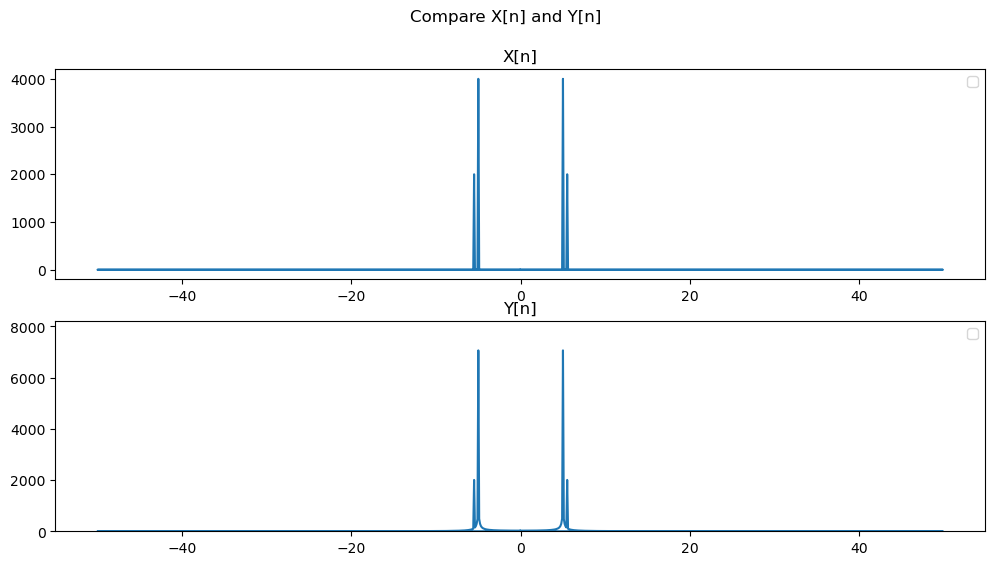

In [317]:
# 进行滤波
y2 = myfilter(b, a, x)

# 计算频率成分
frequencies = np.fft.fftfreq(len(x), d=1/fs)
Y2, wy2 = dft(y2)

# 计算5Hz和5.5Hz的幅度
amp_x_5 = np.abs(X[np.isclose(frequencies, 5, atol=0.1)]).sum()
amp_x_5_5 = np.abs(X[np.isclose(frequencies, 5.5, atol=0.1)]).sum()
amp_y2_5 = np.abs(Y2[np.isclose(frequencies, 5, atol=0.1)]).sum()
amp_y2_5_5 = np.abs(Y2[np.isclose(frequencies, 5.5, atol=0.1)]).sum()

print(f'信号 x[n] 中 5Hz 的幅度: {amp_x_5:.2f}')
print(f'信号 x[n] 中 5.5Hz 的幅度: {amp_x_5_5:.2f}')
print(f'滤波后信号 y2 中 5Hz 的幅度: {amp_y2_5:.2f}')
print(f'滤波后信号 y2 中 5.5Hz 的幅度: {amp_y2_5_5:.2f}')

plt.figure(figsize=(12, 6))

plt.suptitle("Compare X[n] and Y[n]")

plt.subplot(211)
plt.title("X[n]")
plt.plot(wx * fs, np.abs(X))
#plt.axvline(x=5, color='r', linestyle='--', label=f'f = {5}')
#plt.axvline(x=5.5, color='g', linestyle='--', label=f'f = {5.5}')
plt.legend()

plt.subplot(212)
plt.title("Y[n]")
plt.plot(wy2 * fs, np.abs(Y2))
plt.ylim(0, 8200)
#plt.axvline(x=5, color='r', linestyle='--', label=f'f = {5}')
#plt.axvline(x=5.5, color='g', linestyle='--', label=f'f = {5.5}')
plt.legend()

plt.show()
